## Imports

In [1]:
import mltlk
print(mltlk.__version__)
from mltlk import *
from sklearn.ensemble import RandomForestClassifier

0.1.15


## Load data
Load data, clean text and use Word2vec word vectors preprocessing.

In [3]:
session = load_data("data/wikipedia_300.csv.gz", conf={
    "preprocess": "word2vec",
    "w2v_vector_size": 75,
    "stopwords": ["english", "stopwords/custom.csv"],
    "clean_text": "letters digits",
})

Info: Clean texts keeping letters and digits
Info: Word2vec embeddings loaded from word2vec/wikipedia_300_75.emb
Info: Loaded 300 examples in 2 categories


#### Show data stats

In [3]:
data_stats(session)

## Evaluate model using cross-validation
Build a RandomForest model and evaluate results using 10-fold cross-validation.

Building and evaluating model using 10-fold cross validaton took 1.54 sec



Results,
Accuracy:,94.00%
F1-score:,94.00%
Precision:,94.00%
Recall:,94.00%


Programming,94.00%,150
Games,6.00%,9
Games,94.00%,150
Programming,6.00%,9


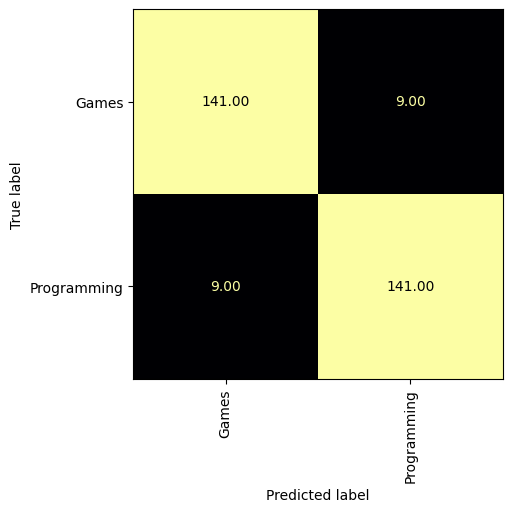

In [4]:
evaluate_model(RandomForestClassifier(), session, reload=False, conf={
    "mode": "CV-10",
    "categories": True,
    "confusion_matrix": True,
    "seed": 42,
})

## Evaluate model using train-test split
Build a RandomForest model and evaluate results using train-test split.

In [5]:
split_data(session, conf={
    "test_size": 0.15,
    "seed": 4,
    "stratify": True,
})

Info: Split data using 85% training data and 15% test data with seed 4 and stratify


In [6]:
evaluate_model(RandomForestClassifier(), session, reload=False, conf={
    "mode": "split",
    "categories": True,
    "seed": 42,
})

Building and evaluating model using train-test split took 0.15 sec



Results,
Accuracy:,95.56%
F1-score:,95.54%
Precision:,95.91%
Recall:,95.56%


Games,100.00%,23
Programming,90.91%,22
Games,9.09%,2


## Build final model and predict example
Build final model using all data and predict an unknown example.

In [7]:
build_model(RandomForestClassifier(), session)
predict("This is an article about gamers - people who love playing games", session)

Info: Building final model on all data took 0.16 sec
Info: Example is predicted as Games
